<a href="https://colab.research.google.com/github/Lucka-Gianvechio/klp-Projeto-IC/blob/main/Projeto_IC_KLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import f_oneway, chisquare
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Carregando o dataframe

In [2]:
boston = datasets.load_boston(return_X_y = False)



1.   Número de casos: 506

2.   Variáveis (14 atributos):


* CRIM - Taxa de criminalidade per capita
* ZN - A proporção de terrenos residenciais zoneada para lotes com mais de 25.000 pés quadrados.
* INDUS - A proporção de acres comerciais não varejistas por cidade.
* CHAS - Variável dummy de Charles River (= 1 se o setor limite rio; 0 caso contrário).
* NOX - Concentração de óxidos nítricos (partes por 10 milhões).
* RM - O número médio de quartos por habitação.
* AGE - A proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
* DIS - Distâncias ponderadas para cinco centros de emprego em Boston.
* RAD - Índice de acessibilidade às autoestradas radiais.
* TAX - Taxa de imposto sobre propriedades de valor integral por US\$ 10.000.
* PTRATIO - Relação aluno-professor por cidade.
* B - $1000 (Bk - 0,63) ^ 2$ onde Bk é a proporção de negros por cidade.
* LSTAT - Percentagem de status inferior da população.
* MEDV - Valor médio das casas em \$1000's.







In [3]:
dataframe = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [4]:
#Dataframe com "data" e "target" concatenados
dataframe['PRICE'] = boston.target

#Interpretando os dados

Primeiro vamos vizualisar as primeiras 15 linhas para ter uma ideia do tipo dos dados

In [5]:
dataframe.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Podemos perceber que a coluna RAD assume valores discretos, enquanto as outras assumem valores contínuos com excessão da coluna CHAS que assume 0 ou 1.

Vamos tratar os valores de 'CHAS' e 'RAD' para serem inteiros.

In [6]:
dataframe = dataframe.astype({'CHAS': int, 'RAD': int})
dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Temos então a tabela que descreve as características principais dos dados.

In [7]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Vamos agora analisar a matriz de correlação usando um "heatmap" para as variáveis contínuas, e um teste "ANOVA" para as discretas.

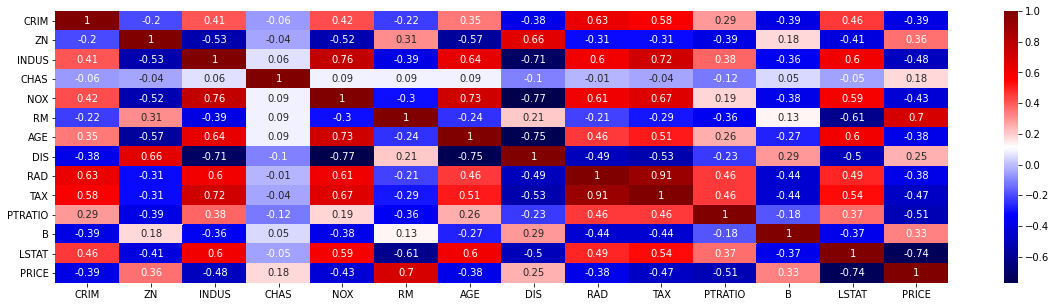

In [27]:
matriz_cor = dataframe.corr().round(2)
plt.figure(figsize=(20,5))
sb.heatmap(matriz_cor, annot = True, cmap = "seismic")
plt.show()

F_onewayResult(statistic=3016.319423620097, pvalue=1.4651540072351664e-305)